# Customer Churn Analysis

## Evaluation Project 7

#### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

#### Solution:

# Summary

- Analysed the Dataset
- Removed columns with null columns and conducted few other Preprocessing steps
- Seperated Categorical and numerical values, with a threshold of unique values set to 5
- Conducted EDA using visualisation.
- Conducted a K best feature approach to verify findings
- used 16 features to predict the the target column.
- the dataset was also imbalanced, used SMOTE to oversample
- Found the best model and random state value with an accuracy score of about 79.0% 
- started Hyper parameter tuning
- After elimnating overfitting using HPT
- The final accuracy score for found to be : 78.74%
- Area Under ROC after HPT wa found to be 83.24%
- Attached Classification report and AuROC plot below.

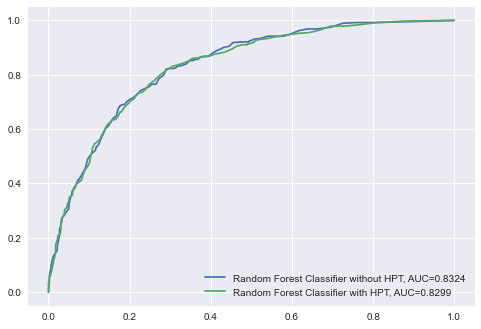

In [300]:
#set up plotting area
plt.figure(0).clf()

#fit ROC before 

y_predd = RFC.predict_proba(test_x)[:, 1]
fpr1, tpr1, _ = roc_curve(test_y, y_predd)
auc1 = round(roc_auc_score(test_y, y_predd), 4)
plt.plot(fpr1,tpr1,label="Random Forest Classifier without HPT, AUC="+str(auc1))

#Fit ROC AFTER

y_predd2 = RFC_best.predict_proba(test_x)[:, 1]
fpr2, tpr2, _ = roc_curve(test_y, y_predd2)
auc2 = round(roc_auc_score(test_y, y_predd2), 4)
plt.plot(fpr2,tpr2,label="Random Forest Classifier with HPT, AUC="+str(auc2))



#add legend
plt.legend()

In [303]:
#Finally lets look at the classification report

print(classification_report(test_y, Y_pred_RFC_best))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1028
           1       0.61      0.62      0.61       379

    accuracy                           0.79      1407
   macro avg       0.73      0.74      0.74      1407
weighted avg       0.79      0.79      0.79      1407



###  Python Implementation

In [204]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt

sns.set(style = 'white')


from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import multilabel_confusion_matrix
import pandas_profiling
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import r2_score,accuracy_score,f1_score,confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')


**Let us read the data file in the python notebook**

In [42]:
data=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv",header=0)
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
# Checking the data types of all the columns
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [39]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Preprocessing before EDA

- Generally we would like to to start preprocessing only after EDA is done, but in this case, the dataset has mix of numerical and categorical data. and can become cumbersome to plot a dedicated graph for each case.
- instead we do some preporocessing on a copy of the original dataset.
- and if all goes well, we can continue to use the same set for the model building as well

Checking for null values

In [43]:
# Converting Total Charges to a numerical data type.
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- Looking at the above, we can say that we have 11 missing values in total charges, instead of imputing, let us drop these rows, as we have enough number of samples and we need to remove only 11. 

In [44]:
#Removing missing values 
data.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = data.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [96]:
df2.Churn = df2.Churn.astype(object)

In [98]:
df2.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [117]:
LE=LabelEncoder()
df2.PaymentMethod=LE.fit_transform(df2.PaymentMethod)
#Temporarily changing type of "PaymentMethod"
df2.PaymentMethod=df2.PaymentMethod.astype(int)        
        

In [120]:
#Encoding all object data using get dummies, and dropping first column
df2=pd.get_dummies(df2, drop_first=True)    

In [122]:
#changing back the type of "Payment Method" to object
df2.PaymentMethod=df2.PaymentMethod.astype(object)
df2

,tenure,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,Churn_1
0,1,2,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,34,3,56.95,1889.50,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,3,53.85,108.15,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,45,0,42.30,1840.75,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,2,2,70.70,151.65,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,3,84.80,1990.50,1,0,1,1,1,0,...,0,1,0,1,0,1,1,0,1,0
7039,72,1,103.20,7362.90,0,0,1,1,1,0,...,0,0,0,1,0,1,1,0,1,0
7040,11,2,29.60,346.45,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
7041,4,3,74.40,306.60,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1


array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

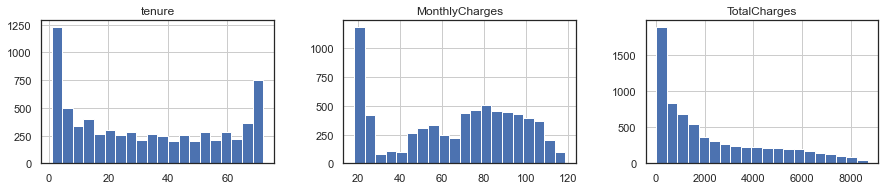

In [127]:
data.hist(figsize=(15,30),grid=True,layout=(9,3),bins=20)

In [163]:
# Seperating categorical and numerical data based on number of unique values. in this case threshold was set to 4.
def num_cat(df):
    num=[]
    cat=[]
    count=df.nunique()
    for i in df.columns:
        if count[i]>5:
            num.append(i)
        else:
            cat.append(i)
    return(num,cat)
num_cat(df2)

(['tenure', 'MonthlyCharges', 'TotalCharges'],
 ['PaymentMethod',
  'gender_Male',
  'SeniorCitizen_1',
  'Partner_Yes',
  'Dependents_Yes',
  'PhoneService_Yes',
  'MultipleLines_No phone service',
  'MultipleLines_Yes',
  'InternetService_Fiber optic',
  'InternetService_No',
  'OnlineSecurity_No internet service',
  'OnlineSecurity_Yes',
  'OnlineBackup_No internet service',
  'OnlineBackup_Yes',
  'DeviceProtection_No internet service',
  'DeviceProtection_Yes',
  'TechSupport_No internet service',
  'TechSupport_Yes',
  'StreamingTV_No internet service',
  'StreamingTV_Yes',
  'StreamingMovies_No internet service',
  'StreamingMovies_Yes',
  'Contract_One year',
  'Contract_Two year',
  'PaperlessBilling_Yes',
  'Churn_1'])

In [170]:
#Lets make a function to visualize categorical data
def Discrete_plots(dfrme, feature_c,invert_axis = False, label = "Churn_1"):
    fig, ax = plt.subplots(ncols= 2, figsize = (12,4))

    if invert_axis == False:
        sns.barplot(x = feature_c, y = label ,data=dfrme,ci=None)
    else:
        sns.barplot(y = feature_c, x = label ,data=dfrme,ci=None)
        
        
    if invert_axis == False:
        sns.countplot(x = feature_c, data=dfrme,hue="Churn_1",ax=ax[0])
    else:
        sns.countplot(y = feature_c, data=dfrme,hue="Churn_1",ax=ax[0])
        
    ax[0].set_title("Relationship between " + feature_c + " vs " + label)    
    ax[1].set_title("Churn by  {}".format(feature_c))
    ax[1].set_ylabel("Average(fraud_reported)")
    plt.tight_layout()

    plt.show()

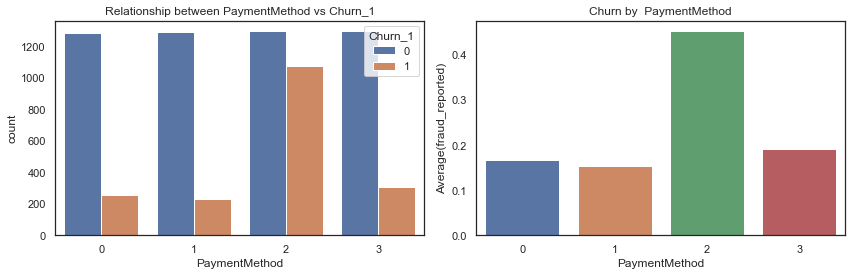

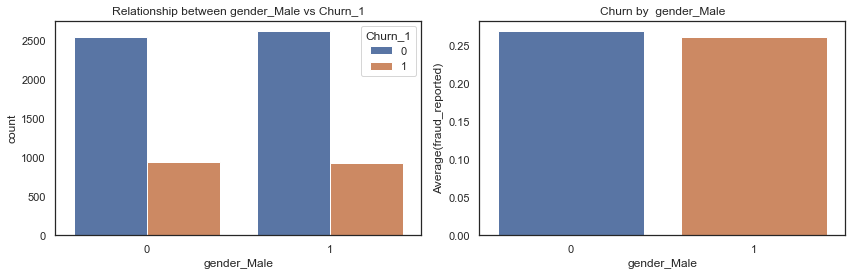

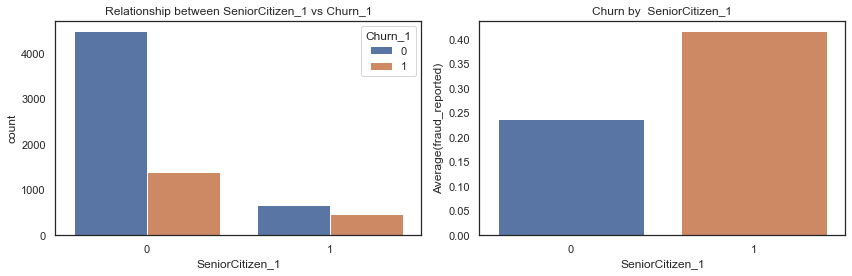

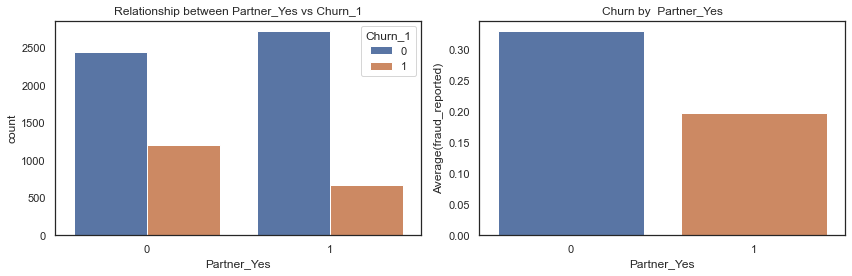

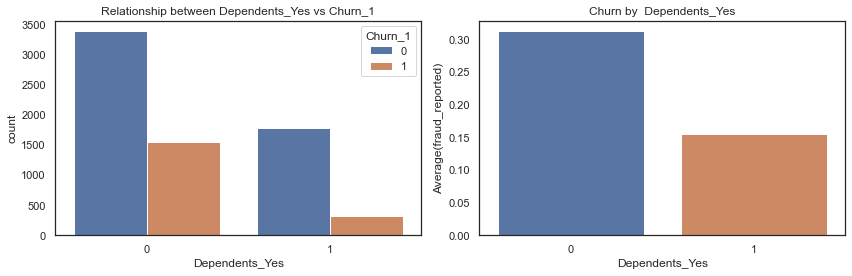

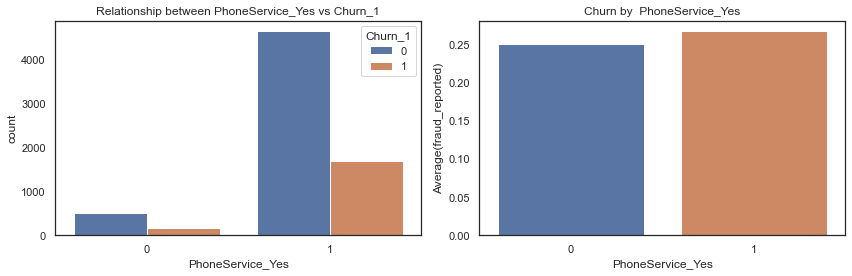

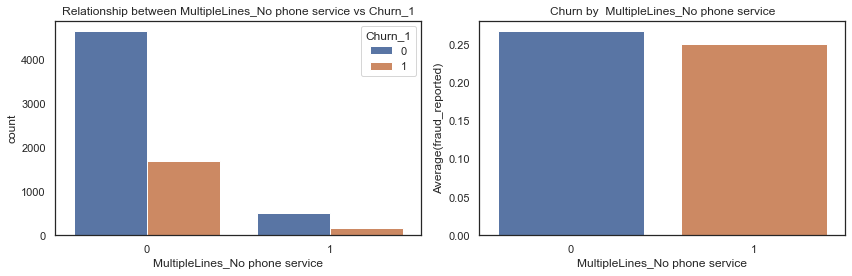

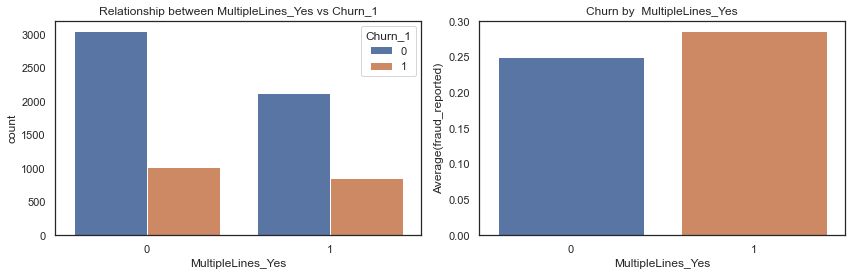

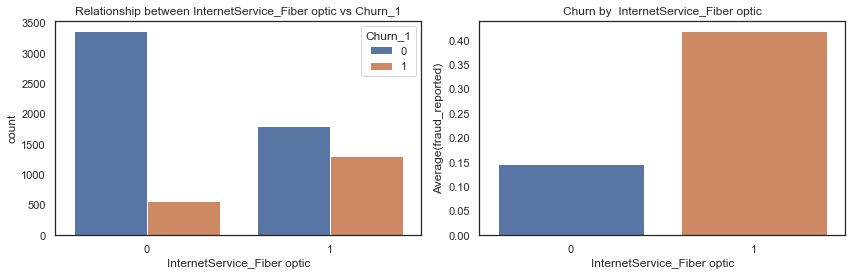

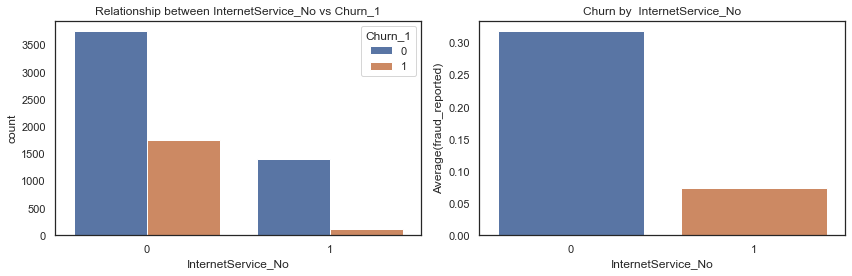

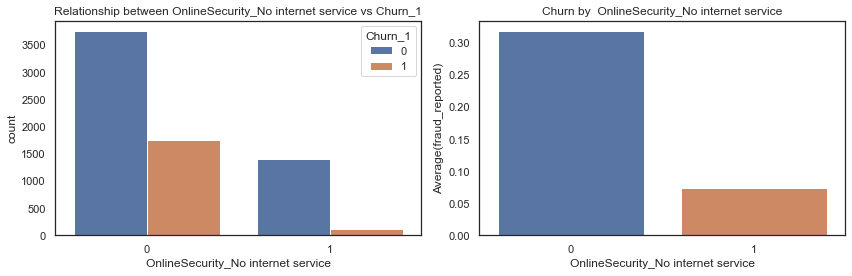

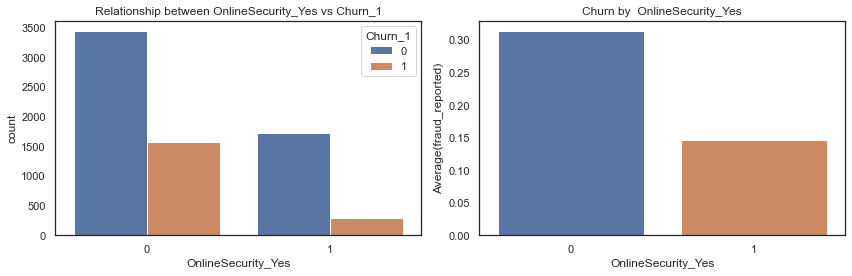

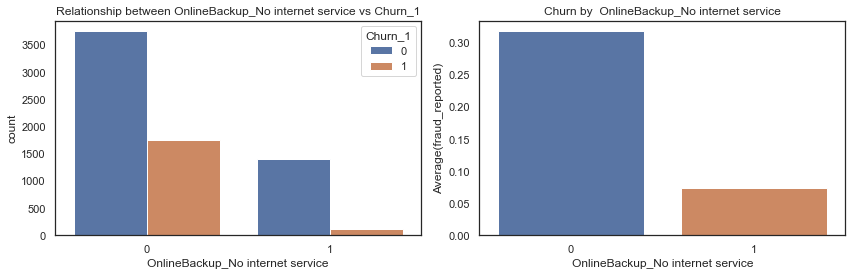

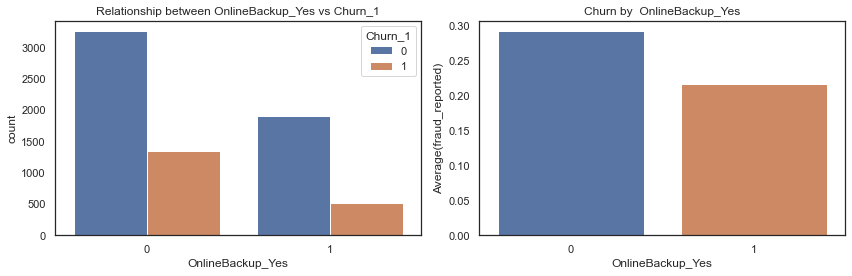

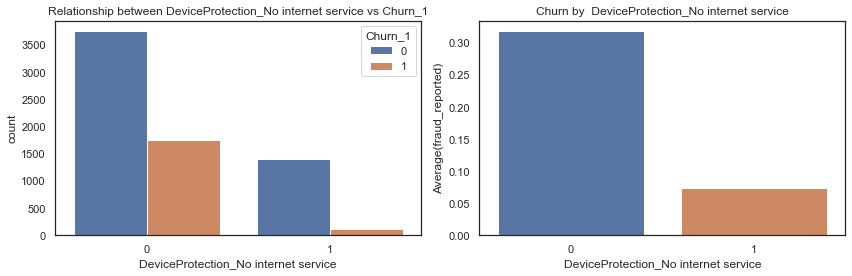

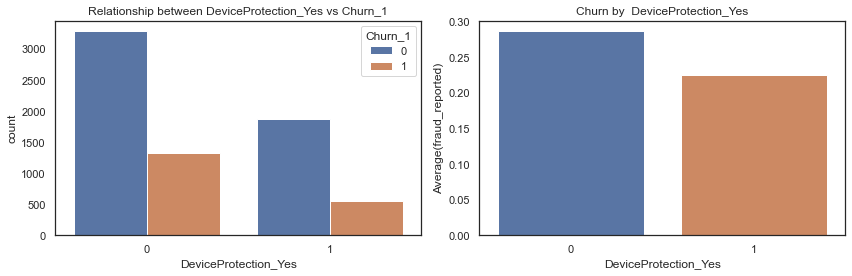

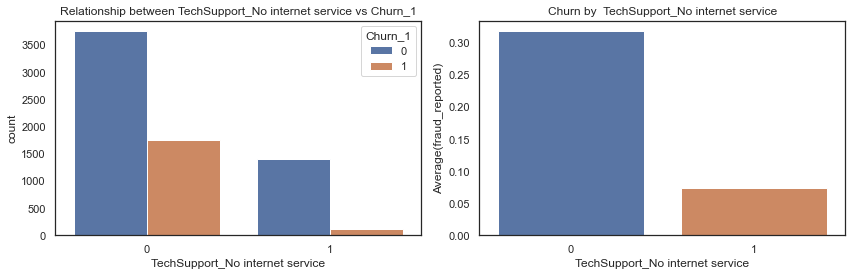

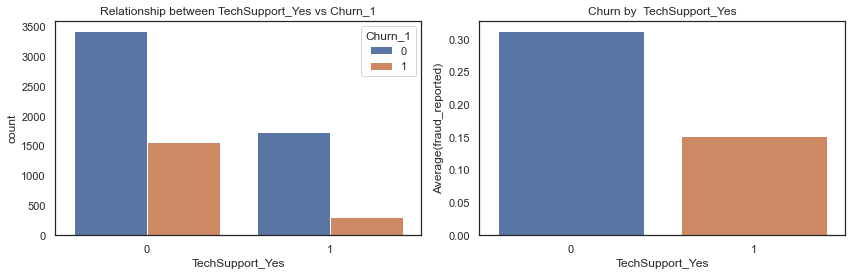

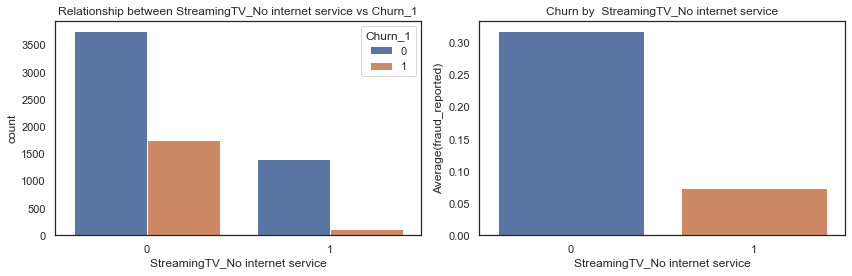

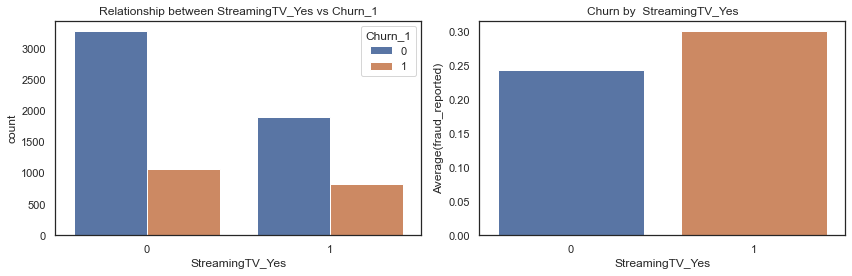

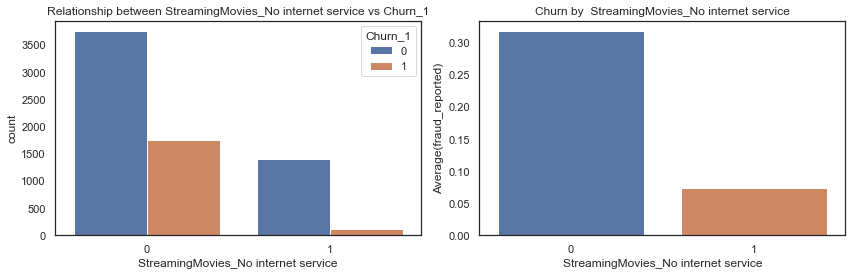

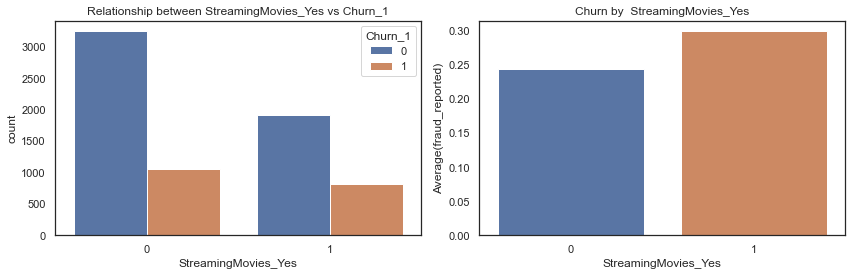

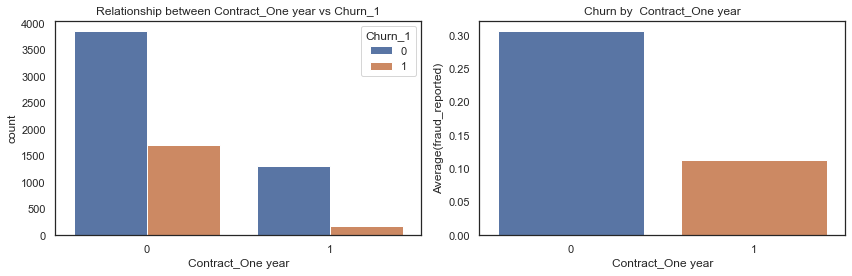

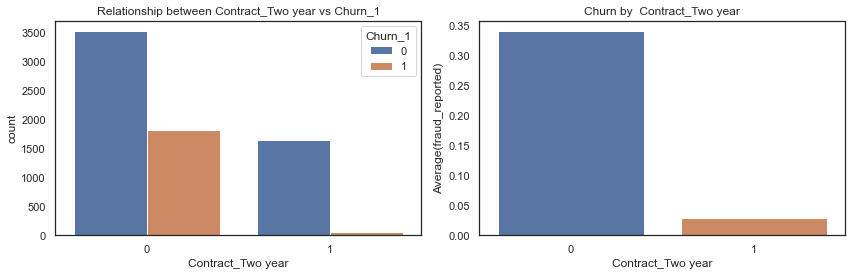

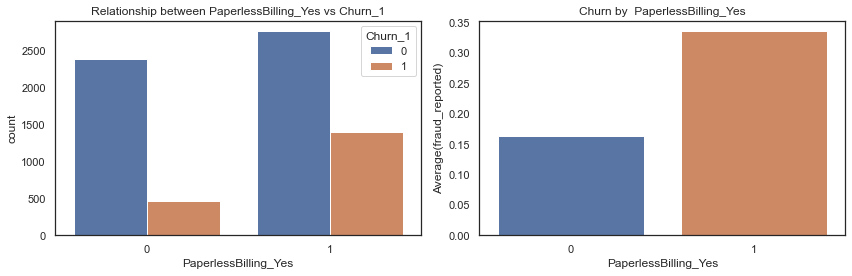

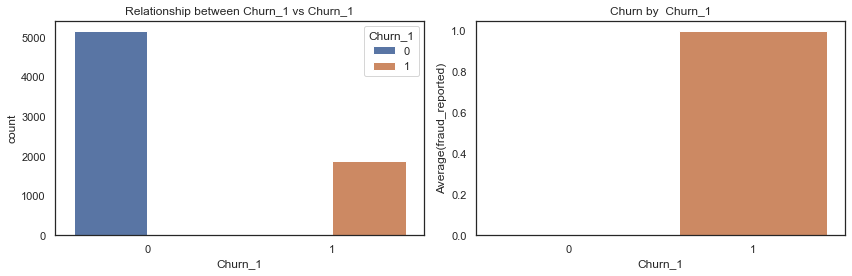

In [171]:

for i in df2[(num_cat(df2)[1])].columns:
    Discrete_plots(df2,feature_c=i)

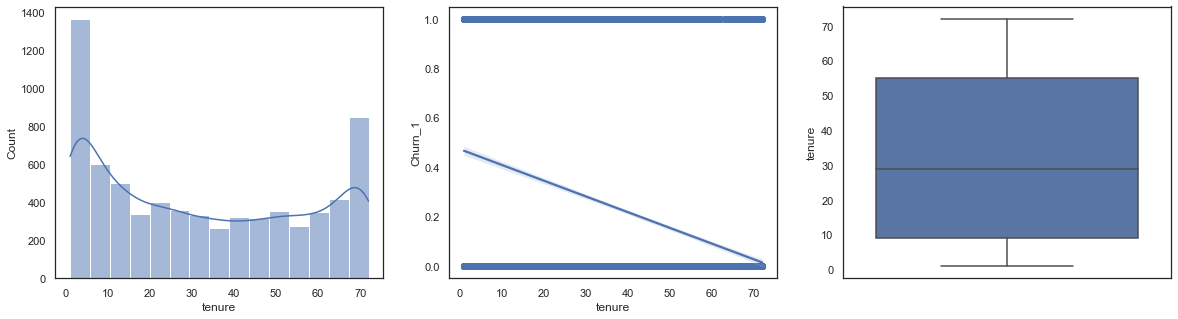

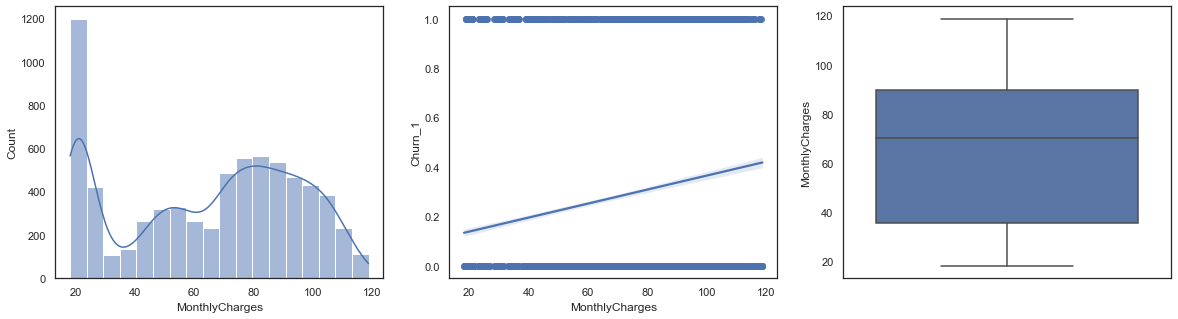

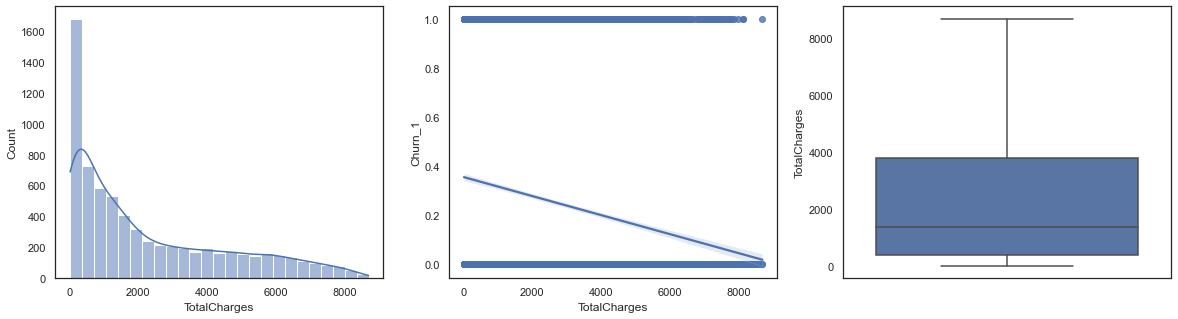

In [173]:
#PLots
for i in df2[(num_cat(df2)[0])].columns:
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=df2,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y=df2.Churn_1,data=data)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=df2)
    plt.show()

<AxesSubplot:>

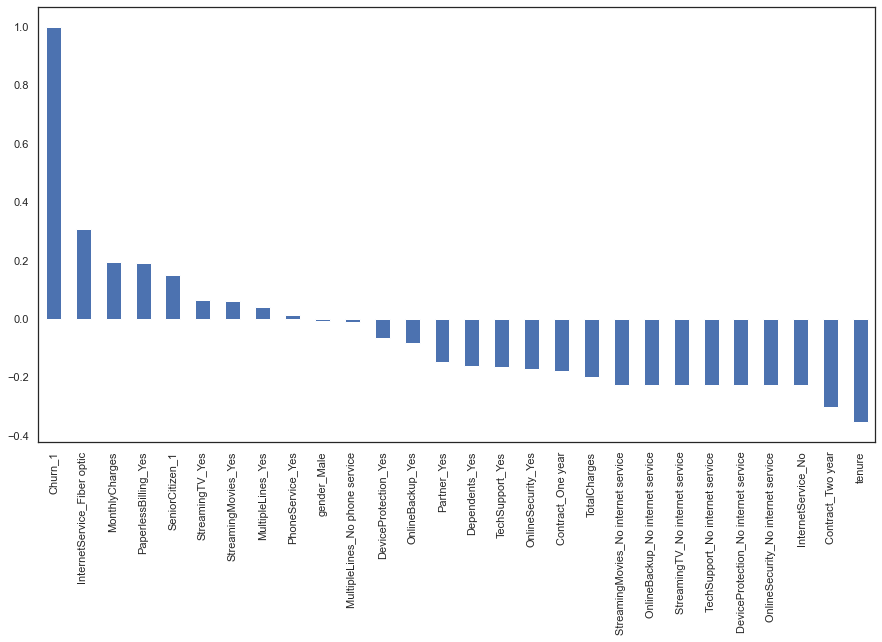

In [174]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df2.corr()['Churn_1'].sort_values(ascending = False).plot(kind='bar')

In [175]:
df2.shape

(7032, 29)

- Through our initial preprocessing we have landed up with 29 columns and 7032 records.
- There seems to be no outliers, although we will crosscheck using zscore>3 method.
- we see that, tenure and total charges have a negative relationship with the churn
- We find that people who pay via "electronic check" have a greater probability of churning. 
- Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn. 
- same applies with people who have stayed with the operator for long, have no online backup, and have device backup.
-  WE can also safely assume looking at the data, that customers who are tech savvy and have a knowledge, generally like to switch.
- Services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

- Let us Further explore with a little more detail.

**A.)** ***Demographics*** - Let us first understand the gender, age range, patner and dependent status of the customers

1. **Gender Distribution** - About half of the customers in our data set are male while the other half are female

2. **% Senior Citizens** - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.


3. **Partner and dependent status**  - About 50% of the customers have a partner, while only 30% of the total customers have dependents. 

Interestingly,  among the customers who have a partner, only about half of them also have a dependent, while other half do not have any independents. 
Additionally, as expected, among the customers who do not have any partner, a majority (80%) of them do not have any dependents .

### B.)  Tenure & Contract

**1. Tenure:**  Seems to be broad stretch to predict anything, because the data spectrum is huge.
But we can say that customers who are very new(say 1-3 months)and very old(70months+) have a more probability of switching

Text(0.5, 1.0, '# of Customers by their tenure')

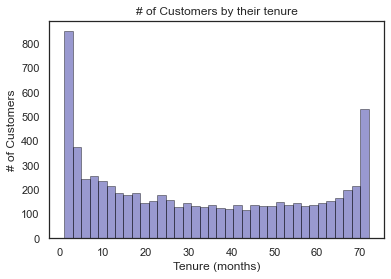

In [179]:
ax = sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

**2. Contracts:** To understand the above graph, lets first look at the # of customers by different contracts. 

Text(0.5, 1.0, '# of Customers by Contract Type')

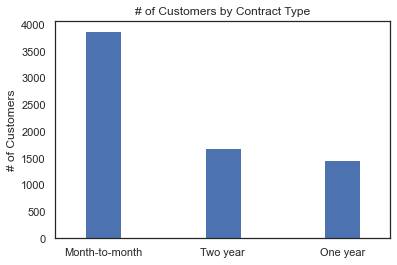

In [15]:
ax = data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Here we can safely assume, that customers on a month to month contract have more chanced of switching



###  C. Let us now look at the distribution of various services used by customers

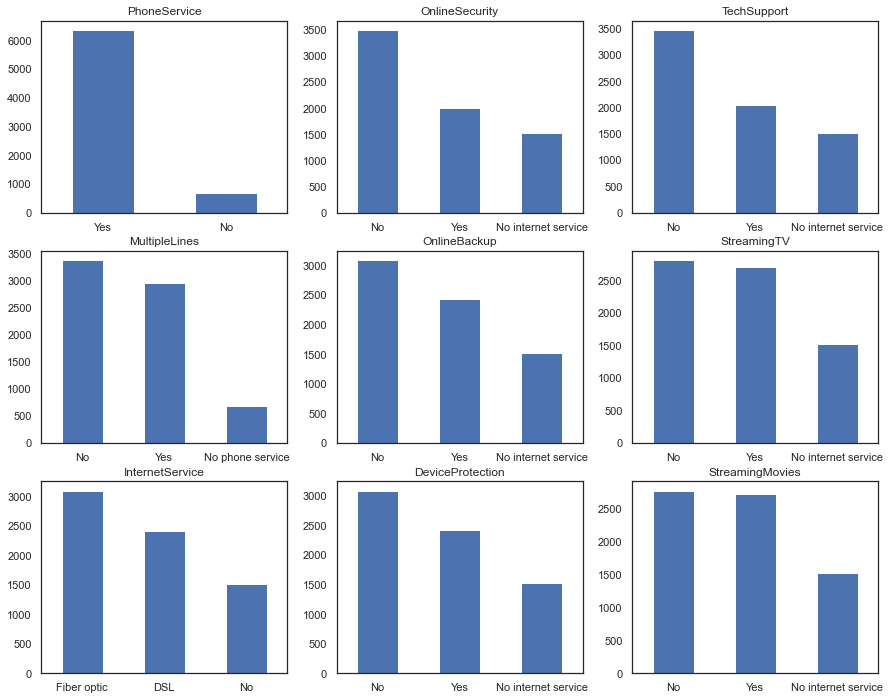

In [126]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

## Lets check if the data is balanced towards the Churn output

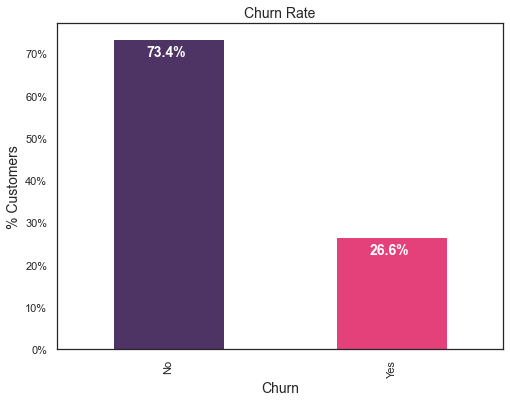

In [182]:
colors = ['#4D3465','#E4417B']
ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar',stacked = True,color = colors,figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

### 5a. Churn by Monthly Charges**: Higher % of customers churn when the monthly charges are high.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

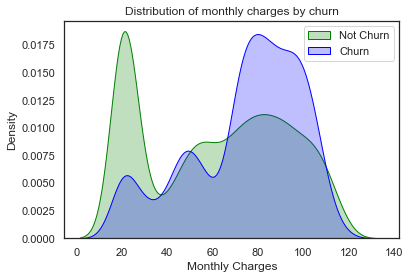

In [185]:
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="green", shade = True)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

### 5b Churn by Total Charges: It seems that there is higer churn when the total charges are lower.

Text(0.5, 1.0, 'Distribution of total charges by churn')

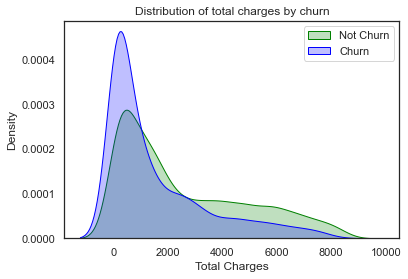

In [187]:
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="green", shade = True)
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

<AxesSubplot:>

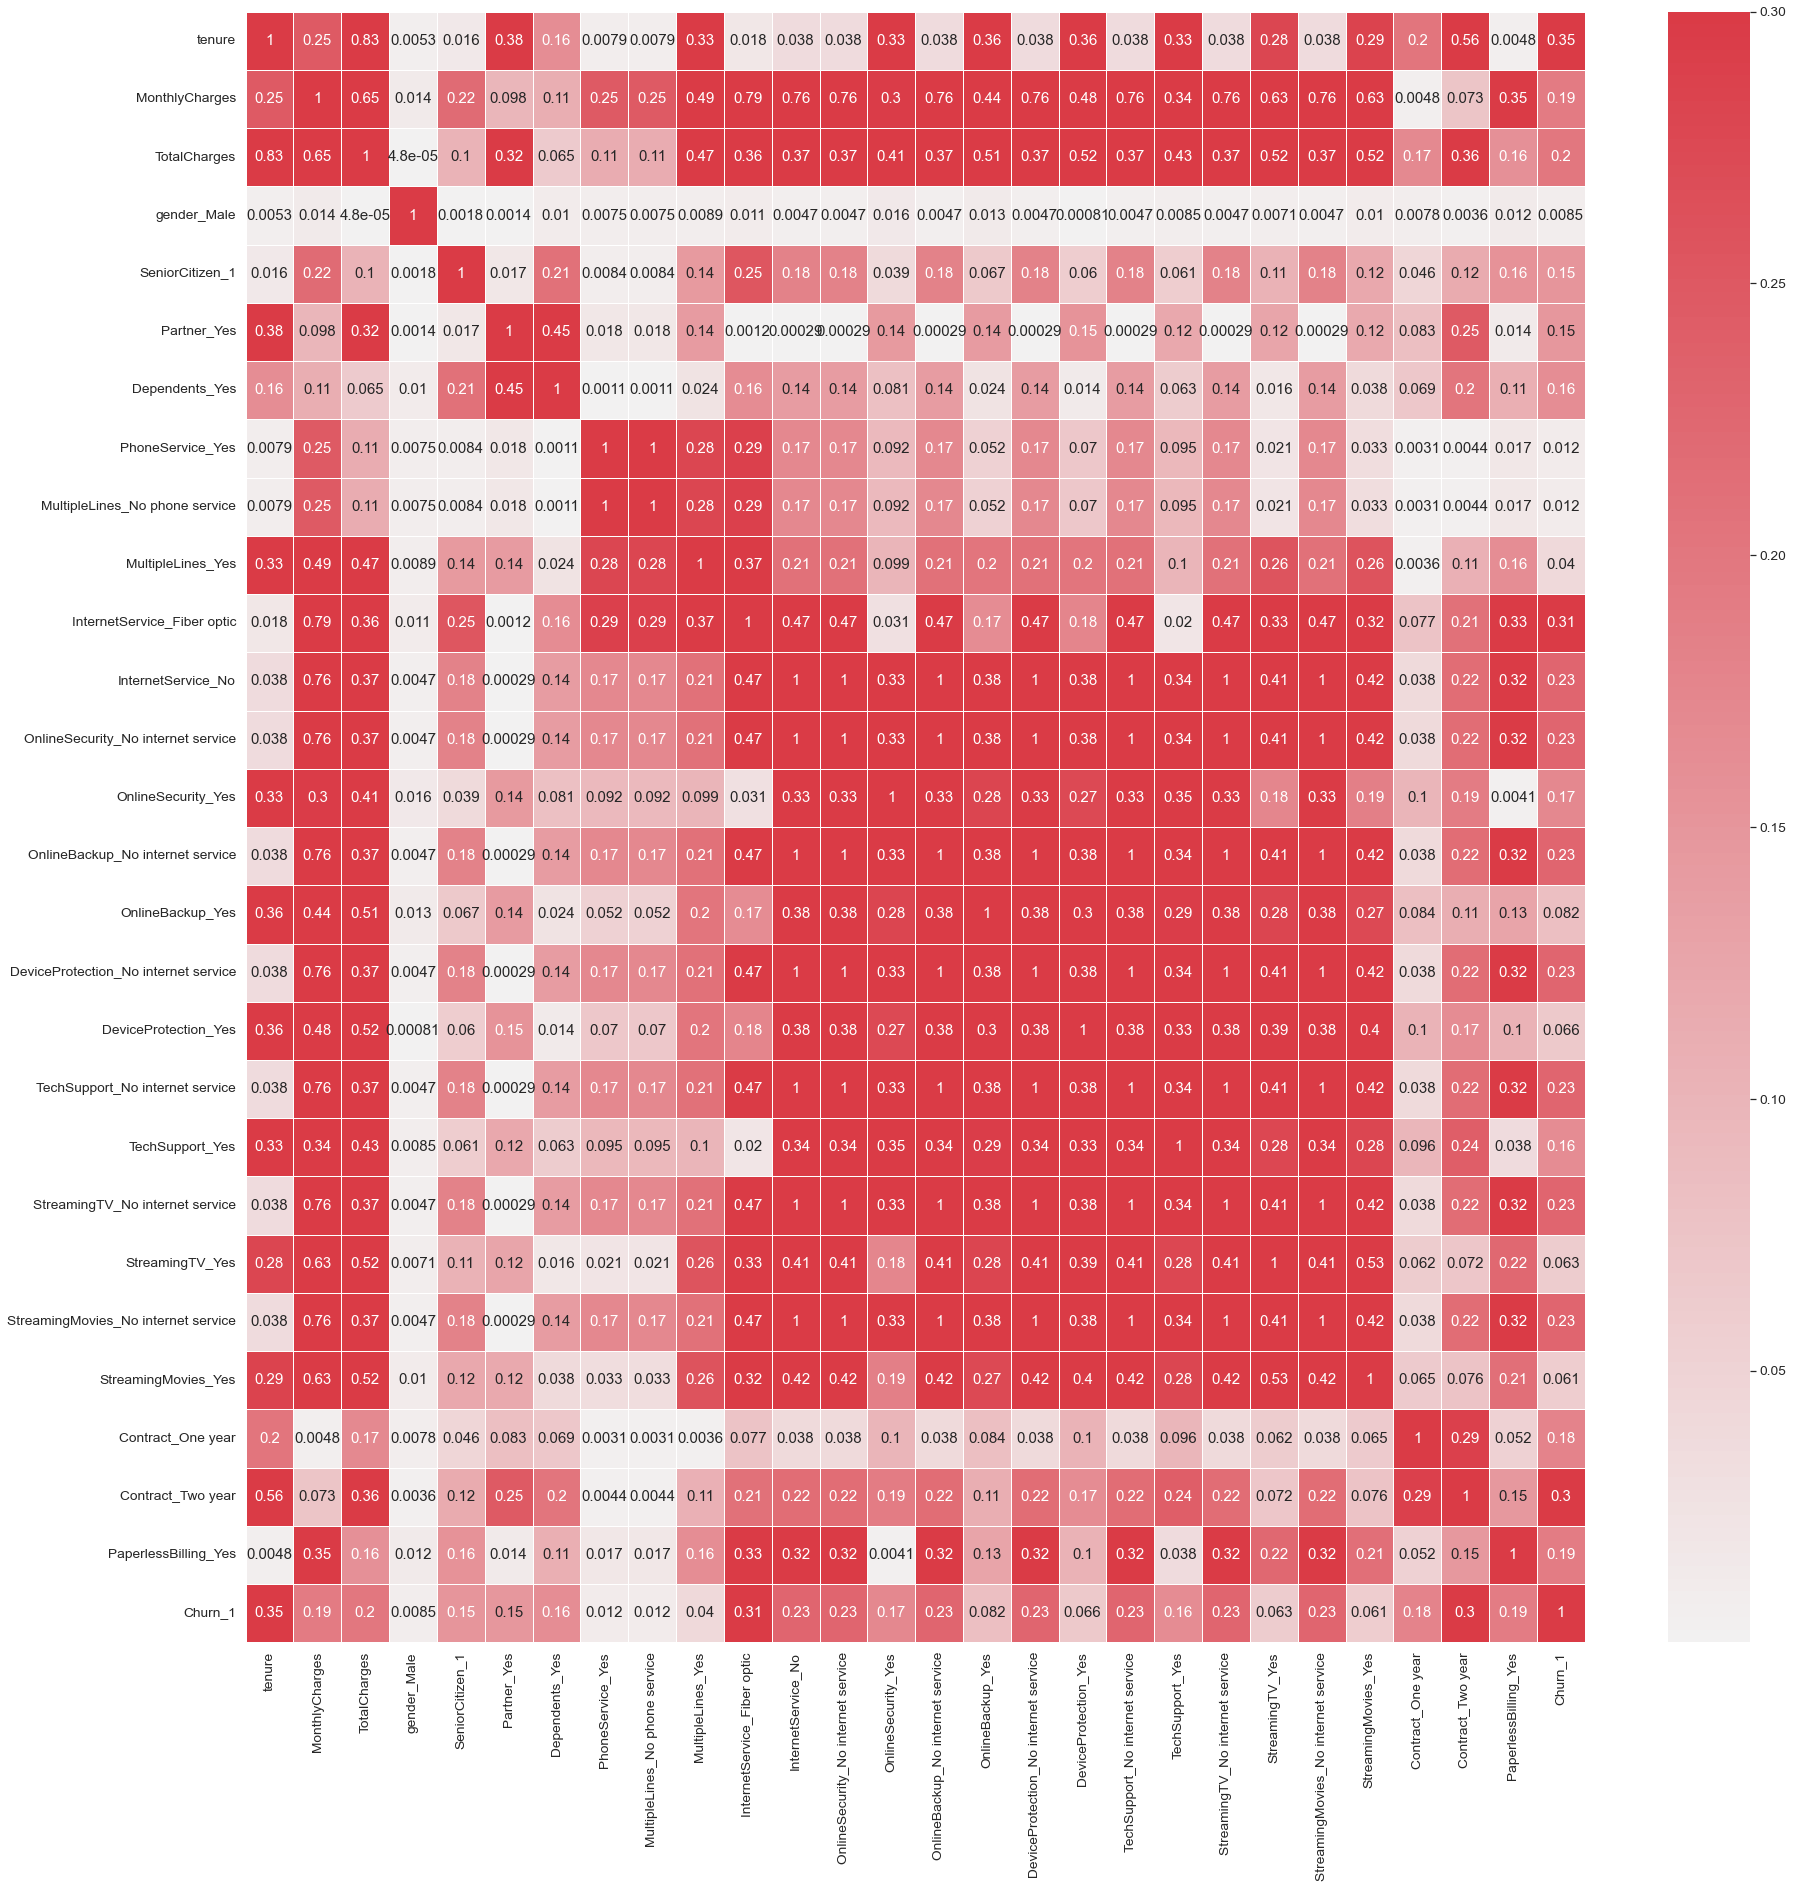

In [190]:
sns.set(style="white")
sns.set(font_scale=1.25)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(abs(df2.corr()), cmap=cmap, vmax=.3, center=0,annot=True, linewidths=.5)

- From the above heatmap we can assume that 
- Churn is mostly correlates to "MonthlyCharges","SeniorCitizen","Fiberoptics","StreamingTV","Paperless billing",
- There are some features that are negativelt correlated as well like  "contractyears",'tenure'
- Other Columns have a fairly lesser correlation.
'

## MODEL BUILDING

- First let us check for outliers and remove them  if they are present. (z>3)

- Check if SMOTE is capable of balancing the data, else we can try Nearmiss algorithm

- Next let us also use the K Best feature selection technique to use the least number of features to achieve the optimal result. 

- We will develop Logistic Regression, Random Forest, Decission tree, KNearest neighbour along with SMOTE.

- Proceed to HyperParameter tuning
- Looking at the metrics

In [203]:
#The above plot shows outliers, lets be sure to find the same manually
#finding Outliers using z-score technique. if z>3 it is supposed to be an outlier

df_z=df2[(num_cat(df2)[0])]
z=np.abs(zscore(df_z))
a=int(df2.size)
df_z = df2[(z<3).all(axis=1)]
print('Percent of data retained = '+ str(int(df_z.size)/a*100),'%')
  

Percent of data retained = 100.0 %


- as we predicted there are no outliers.


In [209]:
scalar=StandardScaler()
scaled_features=['tenure', 'MonthlyCharges', 'TotalCharges']
df2[scaled_features] = scalar.fit_transform(df2[scaled_features])

In [221]:
#Seperating Target and feature columns
y=df2['Churn_1']
X= df2.drop('Churn_1',axis=1)

In [212]:
#Display of features
X

,tenure,PaymentMethod,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes
0,-1.280248,2,-1.161694,-0.994194,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.064303,3,-0.260878,-0.173740,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,-1.239504,3,-0.363923,-0.959649,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.512486,0,-0.747850,-0.195248,1,0,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
4,-1.239504,2,0.196178,-0.940457,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.343137,3,0.664868,-0.129180,1,0,1,1,1,0,...,1,0,1,0,1,0,1,1,0,1
7039,1.612573,1,1.276493,2.241056,0,0,1,1,1,0,...,1,0,0,0,1,0,1,1,0,1
7040,-0.872808,2,-1.170004,-0.854514,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
7041,-1.158016,3,0.319168,-0.872095,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [222]:
#Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5274, 28)
Number transactions y_train dataset:  (5274,)
Number transactions X_test dataset:  (1758, 28)
Number transactions y_test dataset:  (1758,)


In [248]:
#Checking if SMOTE is capable removing the Imbalance
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  


SM = SMOTE(random_state = 2)
X_train_res, y_train_res = SM.fit_resample(X_train, y_train.ravel())
x_test_res, y_test_res = SM.fit_resample(X_test, y_test.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 1405
Before OverSampling, counts of label '0': 3869 

After OverSampling, the shape of train_X: (7738, 28)
After OverSampling, the shape of train_y: (7738,) 

After OverSampling, counts of label '1': 3869
After OverSampling, counts of label '0': 3869


#### SMOTE Fixes the imbalance by Oversampling, we can use this while we are training and testing the model

In [224]:
#Using Kbest for reference
bestk = SelectKBest(score_func=f_classif,k=28)
fit=bestk.fit(X_train_res,y_train_res)
df_scores=pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train_res.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(28,'Score'))

                            Feature_Name        Score
0                                 tenure  1728.423299
26                     Contract_Two year  1471.299491
11           InternetService_Fiber optic   963.515886
23   StreamingMovies_No internet service   715.851353
21       StreamingTV_No internet service   715.851353
19       TechSupport_No internet service   715.851353
17  DeviceProtection_No internet service   715.851353
15      OnlineBackup_No internet service   715.851353
13    OnlineSecurity_No internet service   715.851353
12                    InternetService_No   715.851353
14                    OnlineSecurity_Yes   658.857727
25                     Contract_One year   607.596470
7                         Dependents_Yes   594.484182
3                           TotalCharges   530.564679
20                       TechSupport_Yes   512.258338
6                            Partner_Yes   488.712167
2                         MonthlyCharges   407.234219
27                  Paperles

#### INFERENCE OF K BEST :
- "Internet service" attributes all havr the same entropy value, hence we'll just use one of them,
- Apart from that we can drop the last 6 columns

In [225]:
X.drop(['StreamingTV_No internet service','TechSupport_No internet service','DeviceProtection_No internet service','OnlineBackup_No internet service','OnlineSecurity_No internet service','InternetService_No','PhoneService_Yes','MultipleLines_No phone service','MultipleLines_Yes','gender_Male','StreamingTV_Yes','StreamingMovies_Yes'],axis=1,inplace=True)

In [269]:
X

,tenure,PaymentMethod,MonthlyCharges,TotalCharges,SeniorCitizen_1,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaperlessBilling_Yes
0,-1.280248,2,-1.161694,-0.994194,0,1,0,0,0,1,0,0,0,0,0,1
1,0.064303,3,-0.260878,-0.173740,0,0,0,0,1,0,1,0,0,1,0,0
2,-1.239504,3,-0.363923,-0.959649,0,0,0,0,1,1,0,0,0,0,0,1
3,0.512486,0,-0.747850,-0.195248,0,0,0,0,1,0,1,1,0,1,0,0
4,-1.239504,2,0.196178,-0.940457,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.343137,3,0.664868,-0.129180,0,1,1,0,1,0,1,1,0,1,0,1
7039,1.612573,1,1.276493,2.241056,0,1,1,1,0,1,1,0,0,1,0,1
7040,-0.872808,2,-1.170004,-0.854514,0,1,1,0,1,0,0,0,0,0,0,1
7041,-1.158016,3,0.319168,-0.872095,1,1,0,1,0,0,0,0,0,0,0,1


**1. Finding Best Model, Random state based on accuracy score and F1 Score**

In [271]:
#Function to choose best classification model, its metrics, and random state. 
#including the SMOTE balancing into this loop
mod=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
max_acc_score=0
max_f1score=0
for r_state in range(0,100):
    train_x,test_x,train_y,test_y=train_test_split(X,y,random_state=r_state,test_size=0.2)
    SM = SMOTE(random_state = r_state)
    X_train_res, y_train_res = SM.fit_resample(train_x, train_y.ravel())
    
    for i in mod:
        i.fit(X_train_res,y_train_res)
        pred_y = i.predict(test_x)
        acc_score=accuracy_score(test_y,pred_y)
        f1_Score=f1_score(test_y,pred_y)
        print(i,"Max_acc score for random state  ",r_state,"is",acc_score, "with f1 Score ", f1_Score)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            max_f1score=f1_Score
            final_state= r_state
            final_model = i
            
            
print("\n\n\n\n\n")
print("Max Acc_score for random state ",final_state,"is",max_acc_score,"and best model is ",final_model, "with f1score as ",max_f1score)

LogisticRegression() Max_acc score for random state   0 is 0.744136460554371 with f1 Score  0.6162046908315565
KNeighborsClassifier() Max_acc score for random state   0 is 0.7299218194740583 with f1 Score  0.5777777777777777
DecisionTreeClassifier() Max_acc score for random state   0 is 0.7370291400142146 with f1 Score  0.5531400966183575
RandomForestClassifier() Max_acc score for random state   0 is 0.7654584221748401 with f1 Score  0.5885286783042394
LogisticRegression() Max_acc score for random state   1 is 0.749822316986496 with f1 Score  0.6317991631799164
KNeighborsClassifier() Max_acc score for random state   1 is 0.7235252309879175 with f1 Score  0.5701657458563536
DecisionTreeClassifier() Max_acc score for random state   1 is 0.7164179104477612 with f1 Score  0.5175332527206772
RandomForestClassifier() Max_acc score for random state   1 is 0.7697228144989339 with f1 Score  0.583547557840617
LogisticRegression() Max_acc score for random state   2 is 0.744136460554371 with f1 Sc

- Based on the above prediction, we find that the best random_state at **67**, 
- And **Random Forest classifier** giving us the best result of  **Accuracy score** of  **0.7903340440653873**  and **f1score** of  **0.6153846153846154**

- let us proceed tp build the model with the above parameters and move towards Hyper Parameter tuning.

<AxesSubplot:>

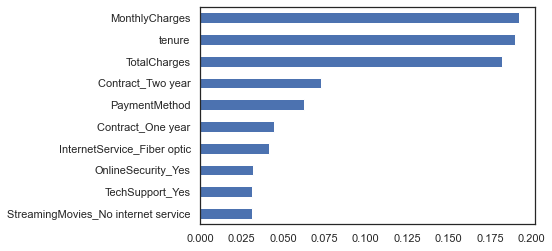

In [272]:
importances = RFC.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

### Initialising the Best model with the predicted best random state.

In [274]:
train_x,test_x,train_y,test_y=train_test_split(X,y,random_state=67,test_size=0.2)
SM = SMOTE(random_state = 67)
X_train_res, y_train_res = SM.fit_resample(train_x, train_y.ravel())
RFC=RandomForestClassifier()
RFC.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [275]:
#Metrics
pred_y = RFC.predict(test_x)
acc_score=accuracy_score(test_y,pred_y)
print(f'Predictions are: ',pred_y)
print(f' \n Accuracy Score of: ',acc_score)

Predictions are:  [0 0 0 ... 1 0 1]
 
 Accuracy Score of:  0.7874911158493249


In [277]:
#Comparing Actual and Predicted Values.
compare=pd.DataFrame({'Actual':test_y,'Predicted':pred_y})
compare.sample(10)

,Actual,Predicted
4934,0,0
3709,0,1
2375,0,0
6811,1,1
2611,1,1
1842,0,0
6119,0,0
4836,0,0
364,0,0
1332,0,0


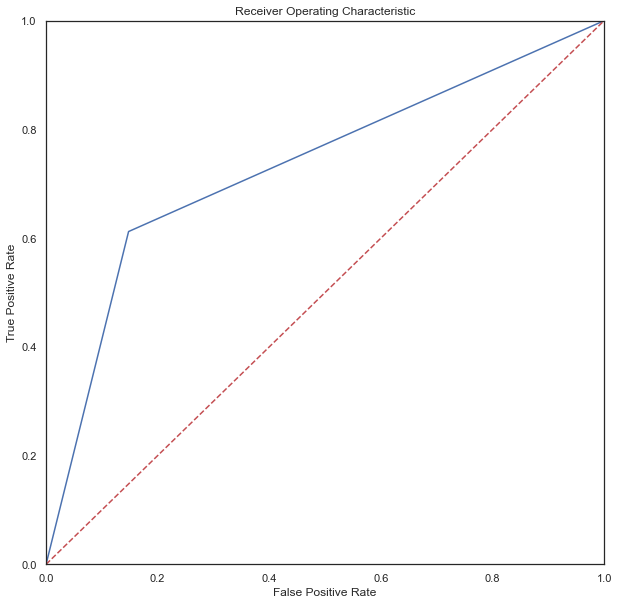

In [278]:
#Ploting ROCb
fpr, tpr, threshold = roc_curve(test_y, pred_y)

f, ax = plt.subplots(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Hyperparameter Tuning
- Now that we have achieved an accuracy score of about 78%
- Let us see how we can improve it using HPT

In [279]:
#initialising range of parameters for sequential testing
n_estimators = [int(x) for x in np.linspace(start=1, stop=150, num=25)]
max_depth = [int(x) for x in np.linspace(20, 150, num=25)]

param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [290]:
#Fitting the above range into previously found model
RFC_HPT = RandomForestClassifier(random_state=67)
rf_cv = RandomizedSearchCV(estimator=RFC_HPT, param_distributions=param_dist, cv=5, random_state=67)

In [291]:
rf_cv.fit(X_train_res,y_train_res)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=67),
                   param_distributions={'max_depth': [20, 25, 30, 36, 41, 47,
                                                      52, 57, 63, 68, 74, 79,
                                                      85, 90, 95, 101, 106, 112,
                                                      117, 122, 128, 133, 139,
                                                      144, 150],
                                        'n_estimators': [1, 7, 13, 19, 25, 32,
                                                         38, 44, 50, 56, 63, 69,
                                                         75, 81, 87, 94, 100,
                                                         106, 112, 118, 125,
                                                         131, 137, 143, 150]},
                   random_state=67)

In [292]:
#Printing the best parameters
print(f'best score is ',rf_cv.best_score_)
print(f'\nBest parameters are ', rf_cv.best_params_)

best score is  0.8357920193470376

Best parameters are  {'n_estimators': 94, 'max_depth': 52}


In [293]:
RFC_best = RandomForestClassifier(max_depth=52, n_estimators=94, random_state=67)
RFC_best.fit(X_train_res,y_train_res)

RandomForestClassifier(max_depth=52, n_estimators=94, random_state=67)

In [294]:
Y_pred_RFC_best = RFC_best.predict(test_x)

In [295]:
Y_pred_RFC_bestt = RFC_best.predict_proba(test_x)
Y_pred_RFC_bestt

array([[0.59574468, 0.40425532],
       [0.91489362, 0.08510638],
       [0.93617021, 0.06382979],
       ...,
       [0.28723404, 0.71276596],
       [0.85106383, 0.14893617],
       [0.13829787, 0.86170213]])

In [296]:
print('Random Forest Classifier with HPT:')
print('Accuracy score:', round(accuracy_score(test_y, Y_pred_RFC_best) * 100, 2))
print('F1 score:', round(f1_score(test_y, Y_pred_RFC_best) * 100, 2))

Random Forest Classifier with HPT:
Accuracy score: 79.03
F1 score: 61.44


**Observations**

- We see a slight drop in accuracy score and a drop of F1 score. possibly due to overfitting.
- WE have achieved a final accuracy score of 79.03

In [297]:
compare2=pd.DataFrame({'Actual':test_y,'Predicted':Y_pred_RFC_best})
compare2.sample(10)

,Actual,Predicted
675,0,0
2601,0,0
5015,0,0
4873,0,0
2311,0,0
1807,1,1
568,1,1
6641,1,1
4148,0,0
5143,0,0


<h3><font color='maroon'><u>Metrics for the Classification Problem</u></font></h3>

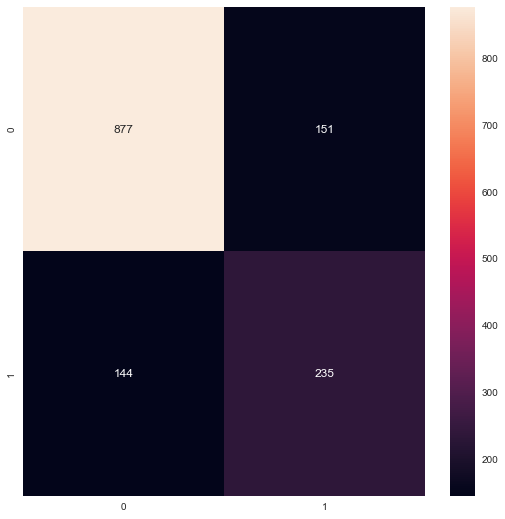

In [298]:
#After the HPT, lets look at the confusion matrix, to look at the number of True Positives...
Conf_mat = confusion_matrix(test_y, Y_pred_RFC_best)

plt.style.use('seaborn')
plt.figure(figsize=(9, 9))
sns.heatmap(Conf_mat, annot=True, fmt='d')
plt.show()

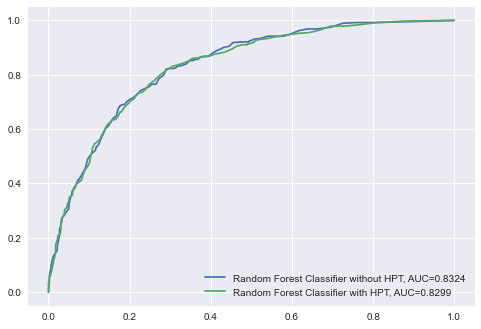

In [300]:
#set up plotting area
plt.figure(0).clf()

#fit ROC before 

y_predd = RFC.predict_proba(test_x)[:, 1]
fpr1, tpr1, _ = roc_curve(test_y, y_predd)
auc1 = round(roc_auc_score(test_y, y_predd), 4)
plt.plot(fpr1,tpr1,label="Random Forest Classifier without HPT, AUC="+str(auc1))

#Fit ROC AFTER

y_predd2 = RFC_best.predict_proba(test_x)[:, 1]
fpr2, tpr2, _ = roc_curve(test_y, y_predd2)
auc2 = round(roc_auc_score(test_y, y_predd2), 4)
plt.plot(fpr2,tpr2,label="Random Forest Classifier with HPT, AUC="+str(auc2))



#add legend
plt.legend()

In [301]:
#Finally lets look at the classification report

print(classification_report(test_y, Y_pred_RFC_best))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1028
           1       0.61      0.62      0.61       379

    accuracy                           0.79      1407
   macro avg       0.73      0.74      0.74      1407
weighted avg       0.79      0.79      0.79      1407



## Summary

- We have finally achieved success in the prediction of an Churn Prediction, where we have an accuracy of about 74%
- The classification report is shown above for a more detail analysis.
- From the ROC curve we have more or less achieved a right angle L, which further strengthens our finding.
- The Final AUROC is 0.8324 after HPT. 
- between the Y/N in the target column, the model has better chances of predicting a "No", than calling it a Churn event.
- Basically this model can basically say that 86% of the time its prediction of a "No" being a negative for Churn Event. which is a good thing.